In [ ]:
# Copyright (c) 2020-2021, NVIDIA CORPORATION.  All rights reserved.
#
# NVIDIA CORPORATION and its licensors retain all intellectual property
# and proprietary rights in and to this software, related documentation
# and any modifications thereto.  Any use, reproduction, disclosure or
# distribution of this software and related documentation without an express
# license agreement from NVIDIA CORPORATION is strictly prohibited.
# Cleanup application
simulation_app.close()


In [1]:
import getpass

user = getpass.getuser()
from isaacsim import SimulationApp

# Set the path below to your desired nucleus server
# Make sure you installed a local nucleus server before this
simulation_app = SimulationApp({"livesync_usd": f"omniverse://localhost/Users/yudaniel888/temp_jupyter_stage.usd"})


Starting kit application with the following args:  ['/home/bigcowfish/.local/share/ov/pkg/isaac-sim-4.1.0/exts/omni.isaac.kit/omni/isaac/kit/simulation_app.py', '/home/bigcowfish/.local/share/ov/pkg/isaac-sim-4.1.0/apps/omni.isaac.sim.python.kit', '--/app/tokens/exe-path=/home/bigcowfish/.local/share/ov/pkg/isaac-sim-4.1.0/kit', '--/persistent/app/viewport/displayOptions=3094', '--/rtx/materialDb/syncLoads=True', '--/rtx/hydra/materialSyncLoads=True', '--/omni.kit.plugin/syncUsdLoads=True', '--/app/renderer/resolution/width=1280', '--/app/renderer/resolution/height=720', '--/app/window/width=1440', '--/app/window/height=900', '--/renderer/multiGpu/enabled=True', '--/app/fastShutdown=False', '--ext-folder', '/home/bigcowfish/.local/share/ov/pkg/isaac-sim-4.1.0/exts', '--ext-folder', '/home/bigcowfish/.local/share/ov/pkg/isaac-sim-4.1.0/apps', '--/physics/cudaDevice=0', '--portable', '--no-window', '--/app/window/hideUi=1']
Passing the following args to the base kit application:  ['-f', 

field-1.1.6] startup
[1.818s] [ext: omni.kit.widget.viewport-106.0.3] startup
[1.820s] [ext: omni.kit.viewport.registry-104.0.6] startup
[1.820s] [ext: omni.kit.widget.text_editor-1.0.2] startup
[1.822s] [ext: omni.kit.viewport.window-106.0.8] startup
[1.834s] [ext: omni.kit.window.property-1.11.1] startup
[1.836s] [ext: omni.usdphysics-106.0.20] startup
[1.841s] [ext: omni.graph.tools-1.78.0] startup
[1.860s] [ext: omni.kit.viewport.utility-1.0.17] startup
[1.861s] [ext: omni.kit.property.usd-3.21.28] startup
[1.867s] [ext: omni.graph-1.135.0] startup
[1.933s] [ext: omni.graph.image.core-0.3.2] startup
[1.937s] [ext: omni.graph.ui-1.70.0] startup
[1.952s] [ext: omni.graph.action_core-1.1.4] startup
[1.964s] [ext: omni.kit.window.cursor-1.1.2] startup
[1.965s] [ext: omni.graph.image.nodes-1.0.2] startup
[1.968s] [ext: omni.graph.action_nodes-1.23.0] startup
[1.975s] [ext: omni.kit.viewport.menubar.core-106.0.2] startup
[1.988s] [ext: omni.graph.nodes-1.143.0] startup
[1.996s] [ext: omn

AttributeError: 'NoneType' object has no attribute 'set_tooltip'

In [ ]:
# Output setup


In [31]:
from omni.isaac.core import World
from omni.isaac.core.objects import DynamicCuboid
import numpy as np

from omni.isaac.franka import Franka
from omni.isaac.franka.controllers import PickPlaceController
from omni.isaac.franka.controllers.stacking_controller import StackingController
from omni.isaac.franka.tasks import Stacking

from omni.isaac.sensor import Camera

import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from omni.isaac.sensor import Camera

In [5]:
world = World(stage_units_in_meters=1.0)
world.scene.add_default_ground_plane()
# A render/ step or an update call is needed to reflect the changes to the opened USD in Isaac Sim GUI
#  Note: avoid pressing play/ pause or stop in the GUI in this workflow.

#Da Cameraaaaaaaaaa lahhhhhhhhhhhhhhhhhhh
resolution = (1920, 1080)
camera = world.scene.add(Camera(prim_path="/World/Fancy_Camera", name="fancy_camera", position=np.array([-5.0, 0.0, 0.4]), orientation=np.array([1.0, 0.0, 0.0, 0.0]), resolution=resolution))
franka = world.scene.add(Franka(prim_path="/World/Fancy_Franka", name="fancy_franka"))
fancy_cube = world.scene.add(
    DynamicCuboid(
        prim_path="/World/random_cube",
        name="fancy_cube",
        position=np.array([0.3, 0.3, 0.3]),
        scale=np.array([0.05015, 0.0505, 0.05015]),
        size=1.0,
        color=np.array([0, 0, 1.0]),
    )
)
world.render()
world.reset()


In [7]:
# This opens the franka finger
world.reset()
franka.gripper.set_joint_positions(franka.gripper.joint_opened_positions)

for i in range(10):
    print(franka.gripper.get_joint_positions())
    world.step(render=True)  # execute one physics step and one rendering step
    
world.render()

[0.05 0.05]
[0.03999998 0.04      ]
[0.04 0.04]
[0.04 0.04]
[0.04 0.04]
[0.04 0.04]
[0.04 0.04]
[0.04 0.04]
[0.04 0.04]
[0.04 0.04]


In [9]:
# This closes the franka finger
world.reset()
franka.gripper.set_joint_positions(franka.gripper.joint_closed_positions)

for i in range(10):
    print(franka.gripper.get_joint_positions())
    world.step(render=True)  # execute one physics step and one rendering step
    
world.render()

[0. 0.]
[9.0769836e-09 1.4597541e-08]
[1.1288139e-08 5.9437366e-09]
[2.6060096e-08 2.4653152e-08]
[2.1479543e-08 1.9357927e-08]
[1.8931997e-08 1.7518314e-08]
[1.6839682e-08 1.5424702e-08]
[1.5182820e-08 1.3765865e-08]
[1.39726515e-08 1.34758800e-08]
[1.3267912e-08 1.0263303e-08]


In [11]:
# Set franka controller
franka_controller = PickPlaceController(name="pick_place_controller", gripper=franka.gripper, robot_articulation=franka,)
print(franka_controller.is_done())

False


In [13]:
# Franka reset
franka_controller.reset()
franka.gripper.set_joint_positions(franka.gripper.joint_opened_positions)

for i in range(10):
    print(franka.gripper.get_joint_positions())
    world.step(render=True)  # execute one physics step and one rendering step
    

[0.05 0.05]
[0.03999999 0.04      ]
[0.04 0.04]
[0.04 0.04]
[0.04 0.04]
[0.04 0.04]
[0.04 0.04]
[0.04 0.04]
[0.04 0.04]
[0.04 0.04]


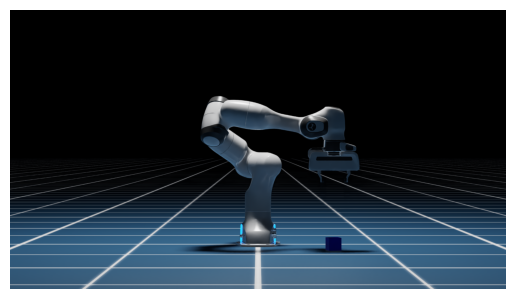

In [27]:
# Trying out camera
import matplotlib.pyplot as plt
camera.initialize()
#print(camera)
rgb_array = camera.get_rgb();
plt.imshow(rgb_array)
plt.axis("off")  # Hide the axes
plt.show()

In [41]:
# Stepping
def physical_step(da_cube, da_bot, da_control):
    # Feedback
    cube_position, _ = da_cube.get_world_pose()
    goal_position = np.array([-0.3, -0.3, 0.0515 / 2.0])
    current_joint_positions = da_bot.get_joint_positions()
    actions = da_control.forward(
        picking_position=cube_position,
        placing_position=goal_position,
        current_joint_positions=current_joint_positions,
    )

    da_bot.apply_action(actions)
    # Only for the pick and place controller, indicating if the state
    # machine reached the final state.
    return da_control.is_done()

world.reset()
franka_controller.reset()
franka.gripper.set_joint_positions(franka.gripper.joint_opened_positions) 

# Video related
# Initialize variables
frames = []
# Directory to save images
output_images_dir = "4"
os.makedirs(output_images_dir, exist_ok=True)  # Create the directory if it doesn't exist

until = 70;

for i in range(5000):
    if i % until == 0:
        rgb_array = camera.get_rgb();
        # Convert RGB to BGR format for OpenCV compatibility
        bgr_array = cv2.cvtColor(rgb_array, cv2.COLOR_RGB2BGR)
        # Define filename for each frame
        filename = os.path.join(output_images_dir, f"frame_{i:04d}.png")
        # Save the image
        cv2.imwrite(filename, bgr_array)
        frames.append(rgb_array)
    if physical_step(fancy_cube, franka, franka_controller):
        world.step(render=True)  # execute one physics step and one rendering step
        print("Doneee")
        break
    #position, orientation = fancy_cube.get_world_pose()
    #linear_velocity = fancy_cube.get_linear_velocity()
    #print("Cube position is : " + str(position))
    #print("Cube's orientation is : " + str(orientation))
    #print("Cube's linear velocity is : " + str(linear_velocity))
    # we have control over stepping physics and rendering in this workflow
    # things run in sync
    world.step(render=True)  # execute one physics step and one rendering step


Doneee


In [47]:
world.reset()

In [ ]:
# Cleanup application
simulation_app.close()
